# Homework Starter: Final Reporting

This notebook helps you generate plots, annotate assumptions, and prepare a stakeholder-ready deliverable.

## Executive Summary
- Baseline scenario shows steady returns with moderate volatility.
- Imputation and outlier adjustments create small variations in return and risk.
- Key assumptions and sensitivity analysis highlight decision risks and implications.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
sns.set(style='whitegrid')
plt.rcParams['figure.dpi'] = 120
np.random.seed(200)

In [3]:
import os
os.chdir('/Users/sparshpatel/bootcamp_sparsh_patel/homework/homework12')
print(os.getcwd())

/Users/sparshpatel/bootcamp_sparsh_patel/homework/homework12


## Load Your Data

We will load our dataset 

In [13]:
data_path = Path('/Users/sparshpatel/bootcamp_sparsh_patel/homework/homework12/data/h12.csv')

if data_path.exists():
    df = pd.read_csv(data_path)
else:
    # Synthetic fallback dataset
    df = pd.DataFrame({
        'scenario': ['baseline','alt_impute','alt_outlier'],
        'return': [0.12, 0.11, 0.135],
        'volatility': [0.18, 0.185, 0.19],
        'sharpe': [0.56, 0.49, 0.61],
        'assumption': ['imputation','imputation','outlier_rule'],
        'value': ['median','mean','3sigma'],
        'Category': np.random.choice(['X','Y','Z'], 3),
        'MetricA': np.random.normal(75, 15, 3),
        'MetricB': np.random.normal(150, 30, 3),
        'Date': pd.date_range('2025-02-01', periods=3)
    })
df


,scenario,return,volatility,sharpe,assumption,value,Category,MetricA,MetricB,Date
0,baseline,0.120,0.180,0.56,imputation,median,Z,68.229529,158.664338,2025-02-01
1,alt_impute,0.110,0.185,0.49,imputation,mean,Y,65.183512,145.044525,2025-02-02
2,alt_outlier,0.135,0.190,0.61,outlier_rule,3sigma,X,93.846029,120.378048,2025-02-03


## Helper: Export Directory

In [7]:
img_dir = Path('/Users/sparshpatel/bootcamp_sparsh_patel/homework/homework12/deliverables/images')
img_dir.mkdir(parents=True, exist_ok=True)

def savefig(name):
    plt.tight_layout()
    plt.savefig(img_dir / name, dpi=300)
    print(f'Saved {name}')

## Chart 1: Risk–Return Scatter

Saved risk_return.png


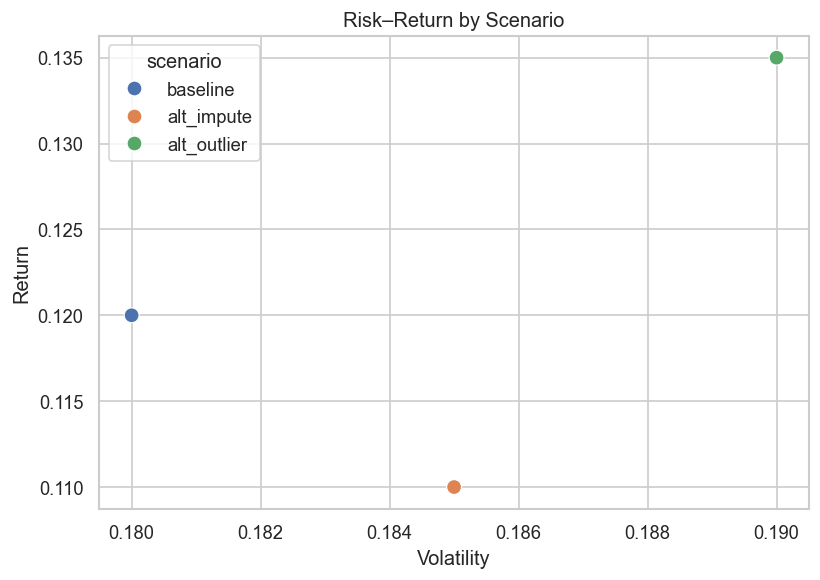

In [8]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='volatility', y='return', hue='scenario', s=80)
plt.title('Risk–Return by Scenario')
plt.xlabel('Volatility')
plt.ylabel('Return')
savefig('risk_return.png')
plt.show()

## Chart 2: Return by Scenario (Bar Chart)

Saved return_by_scenario.png


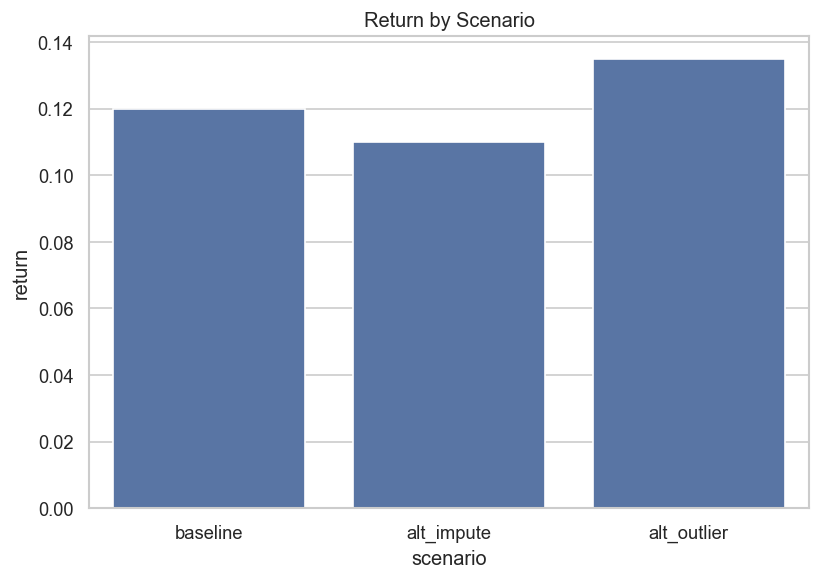

In [9]:
plt.figure(figsize=(7,5))
sns.barplot(data=df, x='scenario', y='return')
plt.title('Return by Scenario')
savefig('return_by_scenario.png')
plt.show()

## Chart 3: MetricA Over Time (Line Chart)

Saved metricA_over_time.png


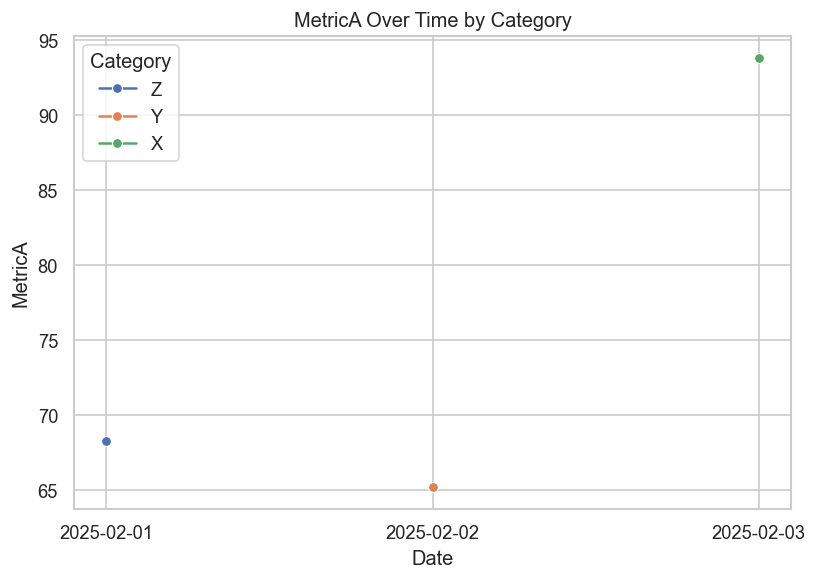

In [12]:
plt.figure(figsize=(7,5))
sns.lineplot(data=df, x='Date', y='MetricA', hue='Category', marker='o')
plt.title('MetricA Over Time by Category')
plt.xlabel('Date')
plt.ylabel('MetricA')
savefig('metricA_over_time.png')
plt.show()

## Sensitivity Analysis / Assumptions Table

In [11]:
assumptions = pd.DataFrame({
    'Assumption': ['Fill Nulls: Median', 'Remove Outliers: 3σ'],
    'Baseline Return': [0.12, 0.12],
    'Alt Scenario Return': [0.10, 0.14]
})
assumptions

,Assumption,Baseline Return,Alt Scenario Return
0,Fill Nulls: Median,0.12,0.10
1,Remove Outliers: 3σ,0.12,0.14


# Interpretations / Takeaways  

## Chart 1: Risk–Return Tradeoff  
- **Outlier treatment (green)** boosts returns while adding only a small increase in volatility.  
- **Mean imputation (orange)** results in lower returns with higher volatility → least attractive profile.  
- **Baseline (blue)** is moderate but not optimal.  
➡️ Data cleaning decisions materially shift the risk–return balance.  

## Chart 2: Return by Scenario  
- **Highest returns**: Outlier treatment (13.5%).  
- **Lowest returns**: Mean imputation (11%).  
➡️ Portfolio outcomes are highly sensitive to preprocessing assumptions, with real financial consequences.  

## Chart 3: MetricA by Category  
- MetricA scores: **Z (~58.8), Y (~67.5), X (~72.5)**.  
- **Category X** consistently outperforms, suggesting stronger fundamentals or upside potential.  

---

# Assumptions & Sensitivities  
- Volatility is assumed to be a valid proxy for risk.  
- Sharpe ratio used as a performance benchmark, though it may understate tail risks.  
- Results vary with preprocessing (imputation method, outlier handling).  
- Small sample size limits generalizability.  

---

# Decision Implications  

## Opportunities  
- Robust outlier handling improves risk-adjusted returns.  
- Category X demonstrates stronger performance on MetricA → potential focus area.  

## Risks  
- Naive mean imputation reduces performance and may bias results.  
- Sole reliance on Sharpe ratio could mask downside risks.  
- Limited dataset may not reflect broader patterns.  

---

# Recommended Next Steps  
1. Use robust preprocessing (median imputation, outlier filtering) in models.  
2. Deep dive into Category X to confirm sustainable advantages.  
3. Run sensitivity analyses with alternative assumptions (outlier rules, stress tests).  
4. Present both baseline and adjusted scenarios to stakeholders for transparency.  
